In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
df_movies = pd.read_csv(r'movies.csv')
df_rating = pd.read_csv(r'ratings.csv')

In [3]:
df_movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
print("Movies data shape: ", df_movies.shape)
print("Ratings data shape: ", df_rating.shape)

Movies data shape:  (10329, 3)
Ratings data shape:  (105339, 4)


In [5]:
df_movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

In [6]:
total_genres=[]
for g in df_movies.genres:
    g=g.split('|')
    if g not in total_genres:
        total_genres.append(g)

In [7]:
total_genres

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Children', 'Drama'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Thriller'],
 ['Mystery', 'Thriller'],
 ['Animation', 'Children', 'Drama', 'Musical', 'Romance'],
 ['Crime', 'Mystery', 'Thriller'],
 ['

In [8]:
df_movies.title.head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [9]:
df_movies.title[4][:-7]

'Father of the Bride Part II'

In [10]:
year, title=[],[]
for t in df_movies.title:
    title.append(t[:-7])
    year.append(t[-7:])

In [11]:
title[:3],year[:3]

(['Toy Story', 'Jumanji', 'Grumpier Old Men'],
 [' (1995)', ' (1995)', ' (1995)'])

In [12]:
final_df = pd.merge(df_rating, df_movies,
how='left',on='movieId')

In [13]:
pd.merge(df_rating,df_movies,how='right',on='movieId')

,userId,movieId,rating,timestamp,title,genres
0,2.0,1,5.0,8.590469e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5.0,1,4.0,1.303501e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,8.0,1,5.0,8.586109e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,11.0,1,4.0,8.508158e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,14.0,1,4.0,8.517663e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
105338,475.0,148238,3.0,1.451213e+09,A Very Murray Christmas (2015),Comedy
105339,458.0,148626,4.0,1.452015e+09,The Big Short (2015),Drama
105340,576.0,148626,4.5,1.451688e+09,The Big Short (2015),Drama
105341,668.0,148626,4.5,1.451148e+09,The Big Short (2015),Drama


In [14]:
pd.merge(df_rating,df_movies,how='left',on='movieId')

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


In [15]:
df_movies1=df_movies.head(5)

In [16]:
df_movies1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
de=pd.merge(df_movies,df_rating,how='left',on='movieId')

In [18]:
final_df = pd.merge(df_rating, df_movies,
how='left',on='movieId')

In [19]:
final_df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


In [20]:
title_rating = final_df.groupby(['title'])[['rating']].sum()
title_rating = title_rating.nlargest(10,'rating')
title_rating.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


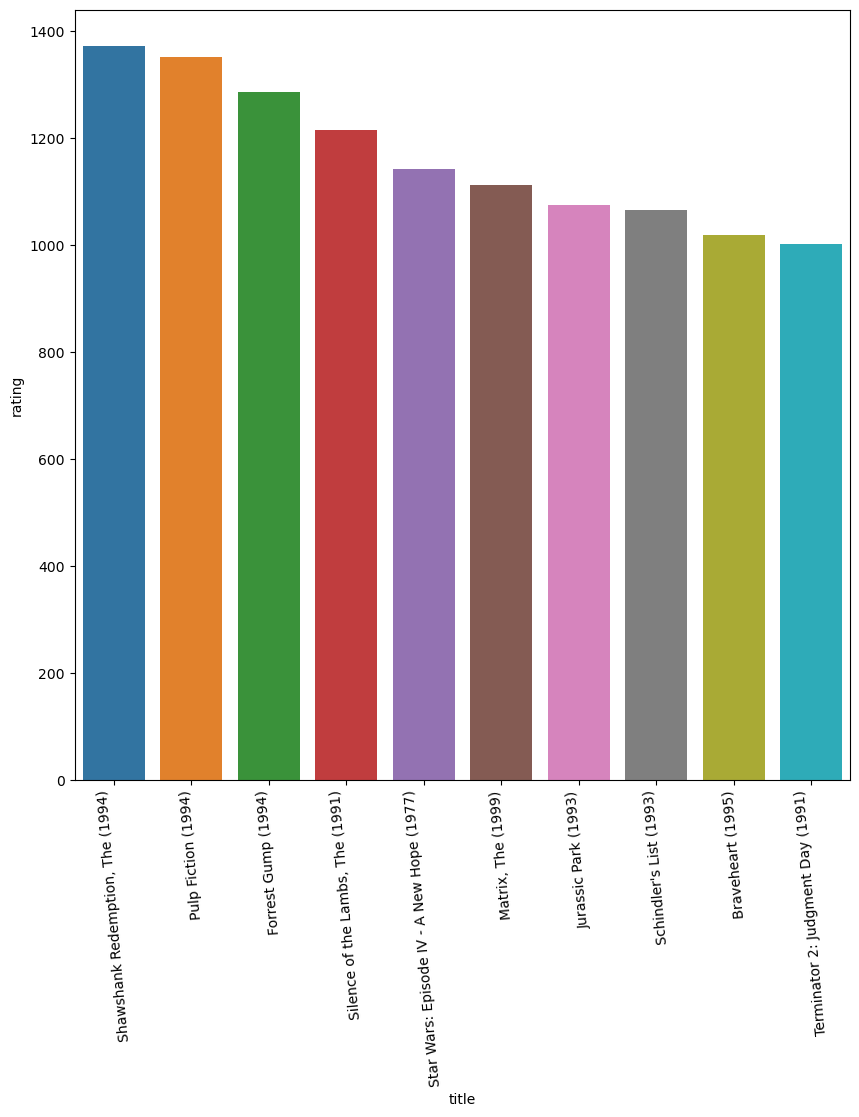

In [21]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=95);
sns.barplot(x=title_rating.index, y=title_rating['rating']);


In [22]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_movies['genres'])

In [23]:
movie_user = final_df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cos_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [25]:
indices=pd.Series(df_movies.index,index=df_movies['title'])
titles=df_movies['title']
def recom_sys(title):
    idx = indices[title]
    similarity_scores = list(enumerate(cos_similarity[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:21]
    movie_indices = [i[0] for i in similarity_scores]
    return titles.iloc[movie_indices]

In [26]:
name=input("enter the movie name")



KeyError: 'toy'

In [27]:
from tkinter import *
from ttkbootstrap.constants import*
import ttkbootstrap as tb
root=tb.Window(themename="superhero")
root.geometry("500x500")
root.title("movie recommendation system")
mylabel=tb.Label(text="MOVIE RECOMMENDATION SYSTEM",bootstyle="primary")
mylabel.pack(pady=10)
root.mainloop()

: 